# Detection of a fraudulent insurance claim project 








**Insurance fraud** is any act committed to defraud an insurance process.It occurs when a claimant attempts to obtain some benefit or advantage they are not entitled to, or when an insurer knowingly denies some benefit that is due.

Every year Fraud insurance represent major losses for insurance companies ($40 billion per year according to the FBI).




The dataset : The dataset is fromm kaggle and is composed of  1000 auto incidents and  auto insurance claims from Illinois, Ohio and Indiande from 01 january 2015 to 01 march 2015 and we do not know if it is from multiple company or just one company. 


Goal of the project :  The main of this project is to build the best model to detect auto insurance fraud.We will use pycaret library to know which model fits the best to be used at the end of the project. 


Ressources :

-How to use special machine learning techniques to detect insurance claims: fraud https://www.youtube.com/watch?v=4Ru3330TnYw&t=1076s

For Real? Auto Insurance Fraud Claim Detection with Machine Learning : 
https://towardsdatascience.com/for-real-auto-insurance-fraud-claim-detection-with-machine-learning-efcf957b38f3

Automate Anomaly Detection Using Pycaret -Data Science And Machine Learning : 
https://www.youtube.com/watch?v=kbssBdFf764



In [1]:
#Libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sweetviz as sv
import pandas_profiling
import plotly.express as px
sns.set_theme(style="ticks", color_codes=True)



In [3]:
data = pd.read_csv('insurance_claims.csv')

# EXPLORATORY DATA ANALYSIS

In [4]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [5]:
#Number of lines and column 
data.shape



(1000, 39)

In [7]:
#Number of fraudulent insurance claim 
data.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

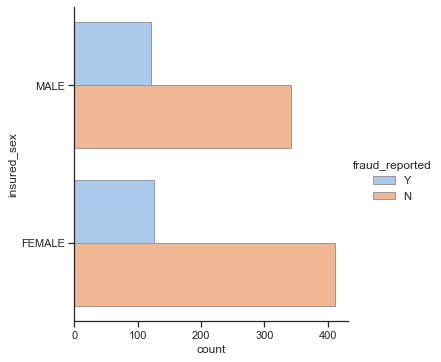

In [8]:
#Creating a dataframe with gender and fraud reported

Gender = data[['insured_sex','fraud_reported']]
Gender.head()
#Plotting gender and fraud reported
sns.catplot(y="insured_sex", hue="fraud_reported", kind="count",
            palette="pastel", edgecolor=".6",
            data=Gender)

 **HOBBIES AND FRAUD REPORTED**

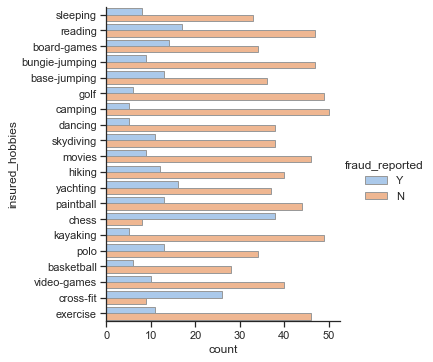

In [9]:
#Creating a dataframe with hobbies and fraud reported

Hobbies = data[['insured_hobbies','fraud_reported']]
Hobbies.head()
#Plotting hobbies and fraud reported
sns.catplot(y="insured_hobbies", hue="fraud_reported", kind="count",
            palette="pastel", edgecolor=".6",
            data=Hobbies)

Even though hobbies are not necessarily a factor of a fraudulent claim it appears that chess players tend to have more often fraudulent claim than other insured who have other hobbies.

**Education level and fraud reported**

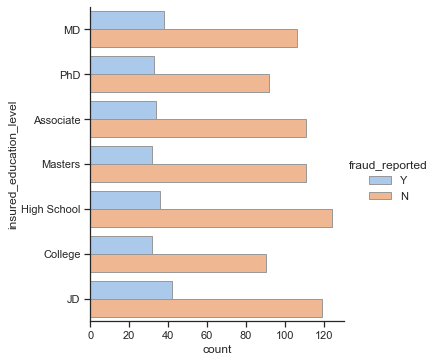

In [10]:
#Creating a dataframe with education level  and fraud reported

Education = data[['insured_education_level','fraud_reported']]
Education.head()
#Plottingeducation level  and fraud reported
sns.catplot(y="insured_education_level", hue="fraud_reported", kind="count",
            palette="pastel", edgecolor=".6",
            data=Education)

In general the more a person is highly educated , the less he tends to make a fraudulent claim.


**Fraud reported and total claim amount**

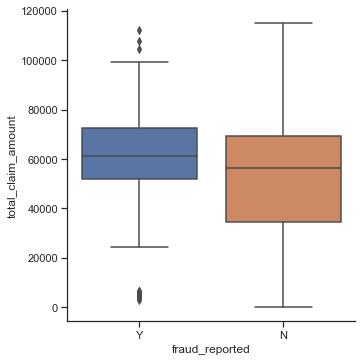

In [11]:
#Creating a dataframe with hobbies and fraud reported

Claim_amount = data[['total_claim_amount','fraud_reported']]
Claim_amount.head()

sns.catplot(x="fraud_reported", y="total_claim_amount", hue="fraud_reported",
            kind="box", dodge=False, data=Claim_amount)

## The best model to predict a fraudulent insurance claim

The model that we will choose will have to be able to classify if a claim is a fraud or not on a data set that it has not seen, accurately.

To find the best model we will use the Pycaret's classification  Module.
**Pycaret's classification Module** is a supervised machine learning module which is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered. Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), disease found (positive or negative). This module can be used for binary or multiclass problems. It provides several pre-processing features that prepare the data for modeling through setup function. It has over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.So, it appears that it is the perfect module for our case.

This module provide several pre-processing features that prepares the data for modeling through setup function.

In [13]:
#Importing the module 
from pycaret.classification import *  
#Initializing the setup 
exp_clf = setup(data, target = 'fraud_reported')

,Description,Value
0,session_id,5542
1,Target,fraud_reported
2,Target Type,Binary
3,Label Encoded,"N: 0, Y: 1"
4,Original Data,"(1000, 39)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,23
8,Ordinal Features,False
9,High Cardinality Features,False


The setup with pycaret allows us to preprocess way more quickly data than if we had used sklearn.
Note that the data have been split here 70/30 the 30% will be used to predict .

In [22]:
#Getting the accuracy , recall , F1 score of the different models 
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8240,0.8641,0.6137,0.6703,0.6349,0.5201,0.5252,8.7090
lightgbm,Light Gradient Boosting Machine,0.8212,0.8707,0.5912,0.6739,0.6218,0.5067,0.5139,0.2090
gbc,Gradient Boosting Classifier,0.8198,0.8684,0.6438,0.6524,0.6408,0.5219,0.5271,0.5250
dt,Decision Tree Classifier,0.8169,0.7478,0.6082,0.6569,0.6247,0.5053,0.5102,0.0810
xgboost,Extreme Gradient Boosting,0.8140,0.8559,0.5801,0.6649,0.6121,0.4912,0.4984,0.9320
ada,Ada Boost Classifier,0.8070,0.8018,0.5542,0.6434,0.5844,0.4620,0.4712,0.2610
et,Extra Trees Classifier,0.7539,0.8487,0.1595,0.5339,0.2387,0.1452,0.1829,0.3340
lr,Logistic Regression,0.7525,0.5962,0.0278,0.3500,0.0511,0.0341,0.0728,0.4440
lda,Linear Discriminant Analysis,0.7525,0.8276,0.0451,0.4000,0.0802,0.0496,0.0851,0.6510
rf,Random Forest Classifier,0.7511,0.8427,0.0578,0.5567,0.1013,0.0599,0.1117,0.3580


Well, it appears  that by executing various machine learning models the Gradient catboost classifier is the best model. Usually to find out this we should have take much more time.But, thanks to pycaret we can quickly see the model that fits well to our dataset.

**Gradient Boost Classifier** had an accuracy of 0.8240 , an F1-score of 0.6349


If you want to learn more about the gradient boost classifier you can check the excellent channel of **StatQuest with Josh Starmer** : https://www.youtube.com/watch?v=jxuNLH5dXCs



In [23]:
#Creating the model 
Gradient = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.8213,0.7647,0.5652,0.6500,0.5144,0.5259
1,0.8571,0.9478,0.6471,0.7333,0.6875,0.5954,0.5973
2,0.7857,0.8529,0.7059,0.5455,0.6154,0.4702,0.4777
3,0.8000,0.8622,0.5000,0.6429,0.5625,0.4355,0.4413
4,0.8143,0.9156,0.6667,0.6316,0.6486,0.5226,0.5229
5,0.8286,0.9156,0.5000,0.7500,0.6000,0.4964,0.5129
6,0.7857,0.7559,0.5556,0.5882,0.5714,0.4287,0.4290
7,0.8429,0.9199,0.6111,0.7333,0.6667,0.5650,0.5690
8,0.8429,0.8809,0.7222,0.6842,0.7027,0.5960,0.5964
9,0.8406,0.8117,0.7647,0.6500,0.7027,0.5948,0.5984


Hyperparameter Tuning in PyCaret can also be done in a single line of code. This is done through random grid search through predefined grids which can be customized.

In [24]:
#Tuning the model 
tune_model(Gradient)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.8873,0.7647,0.5652,0.6500,0.5144,0.5259
1,0.8286,0.9279,0.6471,0.6471,0.6471,0.5339,0.5339
2,0.8143,0.8935,0.7059,0.6000,0.6486,0.5236,0.5268
3,0.8571,0.8702,0.6111,0.7857,0.6875,0.5968,0.6047
4,0.8143,0.9124,0.7222,0.6190,0.6667,0.5390,0.5421
5,0.8571,0.9322,0.6111,0.7857,0.6875,0.5968,0.6047
6,0.8000,0.7703,0.6667,0.6000,0.6316,0.4948,0.4961
7,0.8143,0.8515,0.3889,0.7778,0.5185,0.4189,0.4576
8,0.8571,0.8996,0.7222,0.7222,0.7222,0.6261,0.6261
9,0.8261,0.8360,0.7059,0.6316,0.6667,0.5495,0.5511


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.47, loss='deviance', max_depth=9,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5542, subsample=0.95, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Well the results has deteriorated so it is better that we continue without tuning.

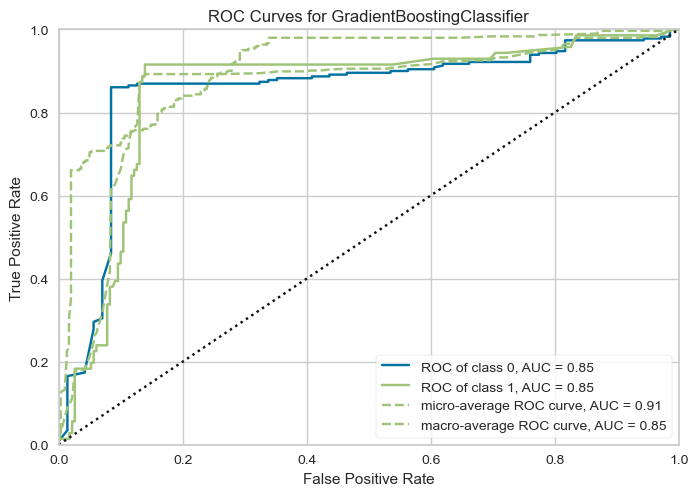

In [25]:
#Vizualizing the model 
plot_model(Gradient)

Area under ROC (Receiver Operating Characteristics) curve tells us how good the model is at distinguishing between classes - predicting fraudulent as fraudulent, and not fraudulent as not fraudulent 

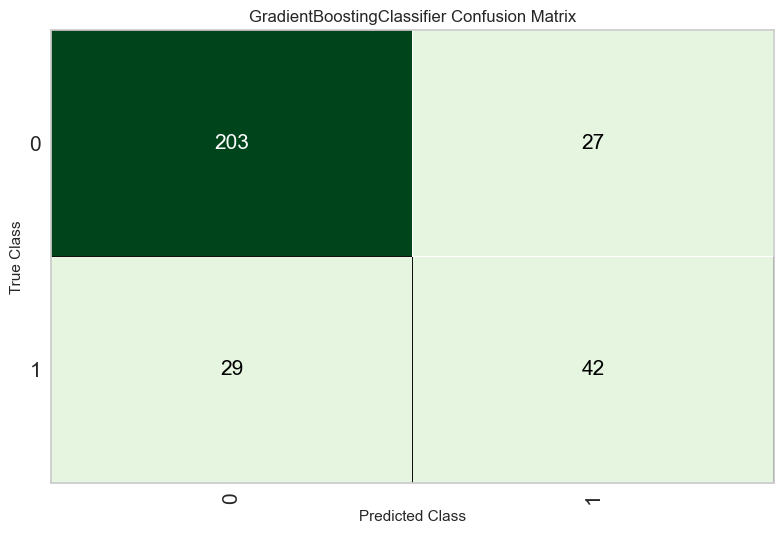

In [26]:
#plotting the confusion matrix 
plot_model(Gradient, 'confusion_matrix')

Again with the confusion matrix  we can see that the model seems to perform pretty well.Of course the model can be better if we had for example a larger dataset.

#  Predictions and saving the model 

As mentioned previously 70% of the data was used in training the model.Now let's use the rest of the data for testing the model and predicting our model result.

In [27]:
predictions = predict_model(Gradient)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8140,0.8521,0.5915,0.6087,0.6000,0.4788,0.4789


So we get an accuracy of 0.8173 and recall of 0.7864 , Precision 0.6087

**Actually the problem of the precision of the model can be explained by the fact that we really had a very tiny dataset and as   we know statistical models perform better when data sets are larger.
  Also , the period is only from january 2015 to march 2015 , then we do no have a better review of the entire year.**



In [28]:
#Saving the model 
save_model(Gradient, model_name = 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='fraud_reported',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
           